In [2]:
import gymnasium as gym
import panda_gym
from stable_baselines3 import TD3
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback

import os
import matplotlib.pyplot as plt


In [4]:
# Create environment
env_id = "PandaPickAndPlace-v3"
env = gym.make(env_id)
env = Monitor(env)
env = DummyVecEnv([lambda: env])  # Wrap for vectorized environments


pybullet build time: Jan 29 2025 23:16:28
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886


In [7]:
# Setup paths
model_save_path = "./td3_panda_model"
log_dir = "./td3_logs/"

In [ ]:

# Create evaluation callback
eval_env = DummyVecEnv([lambda: gym.make(env_id)])
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=model_save_path,
    log_path=log_dir,
    eval_freq=5000,
    deterministic=True,
    render=False,
)

# Define and train the model
model = TD3("MultiInputPolicy", env, verbose=1, tensorboard_log=log_dir)
model.learn(total_timesteps=100000, callback=eval_callback)

# Save the final model
model.save(f"{model_save_path}/final_td3_model")


argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
Using cuda device
Logging to ./td3_logs/TD3_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 11       |
|    time_elapsed    | 17       |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | 1.19     |
|    critic_loss     | 0.00224  |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.9     |
|    ep_rew_mean     | -43.8    |
|    success_rate    | 0.125    |
| time/              |          |
|    episodes        | 8        |
|    fps          

/home/kamal/.local/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-50.00 +/- 0.00
Episode length: 50.00 +/- 0.00
Success rate: 0.00%
---------------------------------
| eval/              |          |
|    mean_ep_length  | 50       |
|    mean_reward     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    total_timesteps | 5000     |
| train/             |          |
|    actor_loss      | 10       |
|    critic_loss     | 0.0687   |
|    learning_rate   | 0.001    |
|    n_updates       | 4899     |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48       |
|    ep_rew_mean     | -48      |
|    success_rate    | 0.04     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 7        |
|    time_elapsed    | 715      |
|    total_timesteps | 5155     |
| train/             |          |
|    actor_loss      | 10.3     |
|    critic_loss     

In [8]:
# Load the trained model
model = TD3.load(f"{model_save_path}/final_td3_model", env=env)


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


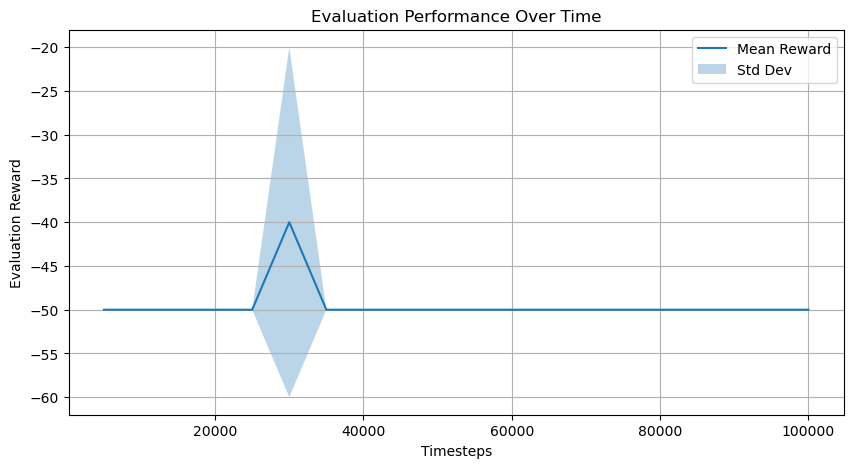

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_evaluations(npz_path):
    data = np.load(npz_path)
    
    timesteps = data["timesteps"]
    rewards = data["results"].mean(axis=1)  # Mean reward across evaluation episodes
    stds = data["results"].std(axis=1)      # Standard deviation

    plt.figure(figsize=(10, 5))
    plt.plot(timesteps, rewards, label="Mean Reward")
    plt.fill_between(timesteps, rewards - stds, rewards + stds, alpha=0.3, label="Std Dev")
    plt.xlabel("Timesteps")
    plt.ylabel("Evaluation Reward")
    plt.title("Evaluation Performance Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# Use correct path to evaluations.npz
plot_evaluations("./td3_logs/evaluations.npz")


In [11]:
# Use 'render_mode="human"' to see GUI or 'rgb_array' for frame array
env = gym.make(env_id, render_mode="human")
obs, _ = env.reset()

done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()


argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=5
argv[0] = --unused
argv[1] = --background_color_red=0.8745098114013672
argv[2] = --background_color_green=0.21176470816135406
argv[3] = --background_color_blue=0.1764705926179886
argv[4] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 2070 Super with Max-Q Design/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 550.120
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 550.120
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX

KeyboardInterrupt: 

In [ ]:
env.close()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


: 